In [1]:
import numpy as np
np.__version__

'1.18.1'

#### import numpy version:`1.11.1` 

In [2]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

In [3]:
v = np.array([1, 2, 3])
print(v, v.shape)

[1 2 3] (3,)


In [4]:
m = np.array([v, v*2]); m, m.shape

(array([[1, 2, 3],
        [2, 4, 6]]), (2, 3))

In [5]:
n = np.array([m*1, m*5, m*10]); n, n.shape

(array([[[ 1,  2,  3],
         [ 2,  4,  6]],
 
        [[ 5, 10, 15],
         [10, 20, 30]],
 
        [[10, 20, 30],
         [20, 40, 60]]]), (3, 2, 3))

In [6]:
m+v

array([[2, 4, 6],
       [3, 6, 9]])

In [7]:
m+v+n

array([[[ 3,  6,  9],
        [ 5, 10, 15]],

       [[ 7, 14, 21],
        [13, 26, 39]],

       [[12, 24, 36],
        [23, 46, 69]]])

In [8]:
v1 = np.expand_dims(v, -1); v1, v1.shape

(array([[1],
        [2],
        [3]]), (3, 1))

In [9]:
v+v1

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [10]:
v = np.array([1,2,3,4])
m = np.array([v,v*2,v*3])
A = np.array([5*m, -1*m])

In [11]:
v.shape, m.shape, A.shape

((4,), (3, 4), (2, 3, 4))

In [12]:
m

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12]])

In [13]:
A

array([[[  5,  10,  15,  20],
        [ 10,  20,  30,  40],
        [ 15,  30,  45,  60]],

       [[ -1,  -2,  -3,  -4],
        [ -2,  -4,  -6,  -8],
        [ -3,  -6,  -9, -12]]])

In [14]:
A + v

array([[[ 6, 12, 18, 24],
        [11, 22, 33, 44],
        [16, 32, 48, 64]],

       [[ 0,  0,  0,  0],
        [-1, -2, -3, -4],
        [-2, -4, -6, -8]]])

In [15]:
A.T.shape

(4, 3, 2)

In [16]:
A + m

array([[[ 6, 12, 18, 24],
        [12, 24, 36, 48],
        [18, 36, 54, 72]],

       [[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]]])

In [17]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, math
from scipy import ndimage, sparse

In [18]:
np.set_printoptions(suppress=True)

## Generate Picture

### generate_synthetic_data() 

In [19]:
l = 8
n_pts = 5
rs = np.random.RandomState(0)

In [20]:
x, y = np.ogrid[0:l, 0:l]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7]]), array([[0, 1, 2, 3, 4, 5, 6, 7]]))

In [21]:
x + y

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14]])

In [22]:
(x - l/2) ** 2 

array([[16.],
       [ 9.],
       [ 4.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 4.],
       [ 9.]])

In [23]:
(x - l/2) ** 2 + (y - l/2)**2

array([[32., 25., 20., 17., 16., 17., 20., 25.],
       [25., 18., 13., 10.,  9., 10., 13., 18.],
       [20., 13.,  8.,  5.,  4.,  5.,  8., 13.],
       [17., 10.,  5.,  2.,  1.,  2.,  5., 10.],
       [16.,  9.,  4.,  1.,  0.,  1.,  4.,  9.],
       [17., 10.,  5.,  2.,  1.,  2.,  5., 10.],
       [20., 13.,  8.,  5.,  4.,  5.,  8., 13.],
       [25., 18., 13., 10.,  9., 10., 13., 18.]])

In [24]:
mask_outer = (x - l/2) ** 2 + (y - l/2) ** 2 < (l/2) ** 2; mask_outer

array([[False, False, False, False, False, False, False, False],
       [False, False,  True,  True,  True,  True,  True, False],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True, False]])

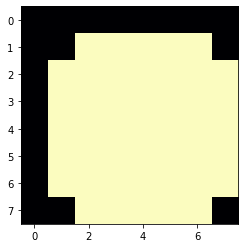

In [46]:
plt.imshow(mask_outer, cmap='magma')


In [38]:
mask = np.zeros((l, l))
mx,my = rs.randint(0, l, (2,n_pts))
mask[mx,my] = 1; mask

array([[0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [39]:
mx, my

(array([0, 0, 4, 2, 1]), array([6, 7, 7, 6, 0]))

In [40]:
rs.randint(0, l, 5)

array([1, 5, 1, 5, 0])

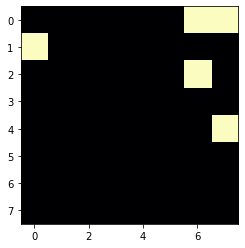

In [41]:
plt.imshow(mask, cmap='magma')

In [42]:
mask = ndimage.gaussian_filter(mask, sigma=l / n_pts)

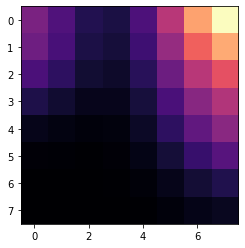

In [49]:
plt.imshow(mask, cmap='magma')

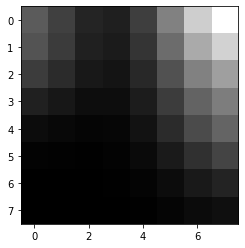

In [50]:
plt.imshow(mask, cmap='gray') ##use gray cmap to get more precise view on the data

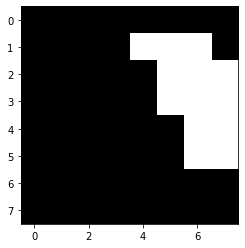

In [51]:
res = np.logical_and(mask > mask.mean(), mask_outer)
plt.imshow(res, cmap='gray');

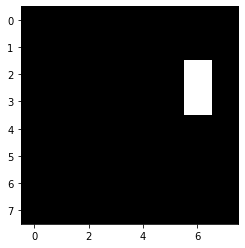

In [52]:
plt.imshow(ndimage.binary_erosion(res), cmap='gray');

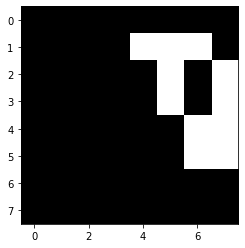

In [53]:
plt.imshow(res ^ ndimage.binary_erosion(res), cmap='gray');

## Generate projection

In [2]:
def _weights(x, dx=1, orig=0):
    x = np.ravel(x)
    floor_x = np.floor((x - orig) / dx)
    alpha = (x - orig - floor_x * dx) / dx
    return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))


def _generate_center_coordinates(l_x):
    X, Y = np.mgrid[:l_x, :l_x].astype(np.float64)
    center = l_x / 2.
    X += 0.5 - center
    Y += 0.5 - center
    return X, Y

In [3]:
def build_projection_operator(l_x, n_dir):
    X, Y = _generate_center_coordinates(l_x)
    angles = np.linspace(0, np.pi, n_dir, endpoint=False)
    data_inds, weights, camera_inds = [], [], []
    data_unravel_indices = np.arange(l_x ** 2)
    data_unravel_indices = np.hstack((data_unravel_indices,
                                      data_unravel_indices))
    for i, angle in enumerate(angles):
        Xrot = np.cos(angle) * X - np.sin(angle) * Y
        inds, w = _weights(Xrot, dx=1, orig=X.min())
        mask = (inds >= 0) & (inds < l_x)
        weights += list(w[mask])
        camera_inds += list(inds[mask] + i * l_x)
        data_inds += list(data_unravel_indices[mask])
    proj_operator = sparse.coo_matrix((weights, (camera_inds, data_inds)))
    return proj_operator

## projection operator

In [114]:
l = 128

In [ ]:
proj_operator = build_projection_operator(l, l // 7)

In [ ]:
proj_operator